In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import optimizers


In [2]:
forecasting = 20

In [3]:
df = pd.read_csv('trainset/J0003_0024_0222_20110307012737_cell_1.csv', encoding='utf8')
df

,MeasuredDate,CellNo,Resistance,Volt,Temp
0,2011.3.7 6:27,1,0.259,2.23,-20
1,2011.3.7 18:29,1,0.260,2.23,-20
2,2011.3.8 6:29,1,0.259,2.23,-20
3,2011.3.8 18:29,1,0.259,2.23,-20
4,2011.3.9 6:29,1,0.259,2.23,-20
...,...,...,...,...,...
254,2011.8.30 5:28,1,0.301,2.23,-20
255,2011.8.30 17:28,1,0.301,2.23,-20
256,2011.8.31 5:28,1,0.302,2.23,-20
257,2011.8.31 16:09,1,0.300,2.23,-20


In [4]:
df = df['Resistance']
df

0      0.259
1      0.260
2      0.259
3      0.259
4      0.259
       ...  
254    0.301
255    0.301
256    0.302
257    0.300
258    0.296
Name: Resistance, Length: 259, dtype: float64

<AxesSubplot:>

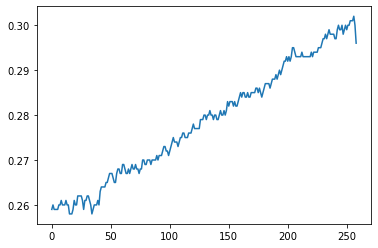

In [5]:
df.plot()

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scale_cols = ['Resistance']
df = pd.DataFrame(df)
df.columns = scale_cols
df_scaled = scaler.fit_transform(df[scale_cols])

df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = scale_cols

print(type(df_scaled))

<class 'pandas.core.frame.DataFrame'>


In [7]:
train = df_scaled

In [8]:
def make_dataset(data, label, window_size=forecasting):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [9]:
feature_cols = ['Resistance']
label_cols = ['Resistance']

train_feature = train[feature_cols]
train_label = train[label_cols]
# test_feature = test[feature_cols]
# test_label = test[label_cols]

train_feature, train_label = make_dataset(train_feature, train_label, forecasting)
total_len = len(train_feature)

x_train = train_feature[:int(total_len*0.8)]
x_valid = train_feature[int(total_len*0.8):]
y_train = train_label[:int(total_len*0.8)]
y_valid = train_label[int(total_len*0.8):]

In [10]:
x_train.shape

(191, 20, 1)

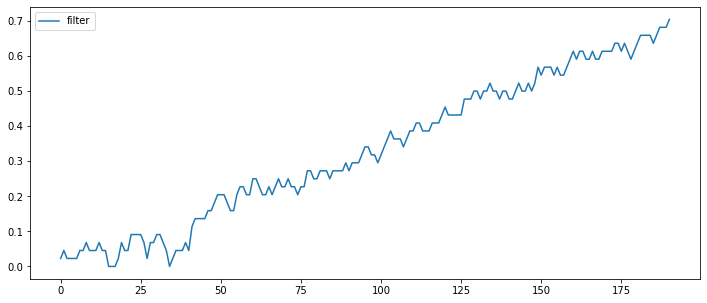

In [11]:
plt.figure(figsize=(12,5))
plt.plot(x_train[:,0,0],label="filter")
# plt.ylim(0,1)
plt.legend()
plt.show()

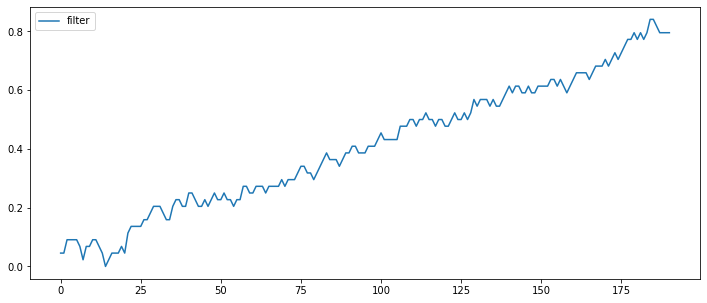

In [12]:
y_train.shape
plt.figure(figsize=(12,5))
plt.plot(y_train[:,0],label="filter")
# plt.ylim(0,1)
plt.legend()
plt.show()

In [13]:
OUT_STEPS = 20

In [14]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(30, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )
model.add(tf.keras.layers.Dense(OUT_STEPS*1))
model.add(tf.keras.layers.Reshape([OUT_STEPS, 1]))

In [15]:
model.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(lr=0.001), metrics=[tf.metrics.MeanAbsoluteError()])
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
filename = os.path.join('models/', 'kjgreftmp_checkpoint.h5')
checkpoint = tf.keras.callbacks.ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

h = model.fit(x_train, x_train, 
                    epochs=1000, 
                    batch_size=16)

Epoch 1/1000
12/12 [==============================] - 1s 4ms/step - loss: 0.2017 - mean_absolute_error: 0.3840
Epoch 2/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.1528 - mean_absolute_error: 0.3282
Epoch 3/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.1171 - mean_absolute_error: 0.2737
Epoch 4/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.0818 - mean_absolute_error: 0.2187
Epoch 5/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.0494 - mean_absolute_error: 0.1665
Epoch 6/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.0283 - mean_absolute_error: 0.1290
Epoch 7/1000
12/12 [==============================] - 0s 5ms/step - loss: 0.0103 - mean_absolute_error: 0.0782
Epoch 8/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.0047 - mean_absolute_error: 0.0519
Epoch 9/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.0032 - mean_absolute_error: 0.0455
E

12/12 [==============================] - 0s 4ms/step - loss: 5.3956e-04 - mean_absolute_error: 0.0184
Epoch 73/1000
12/12 [==============================] - 0s 4ms/step - loss: 5.3381e-04 - mean_absolute_error: 0.0184
Epoch 74/1000
12/12 [==============================] - 0s 4ms/step - loss: 5.2315e-04 - mean_absolute_error: 0.0183
Epoch 75/1000
12/12 [==============================] - 0s 4ms/step - loss: 5.6359e-04 - mean_absolute_error: 0.0187
Epoch 76/1000
12/12 [==============================] - 0s 4ms/step - loss: 5.7253e-04 - mean_absolute_error: 0.0190
Epoch 77/1000
12/12 [==============================] - 0s 5ms/step - loss: 5.9090e-04 - mean_absolute_error: 0.0191
Epoch 78/1000
12/12 [==============================] - 0s 4ms/step - loss: 5.3474e-04 - mean_absolute_error: 0.0184
Epoch 79/1000
12/12 [==============================] - 0s 4ms/step - loss: 5.5624e-04 - mean_absolute_error: 0.0187
Epoch 80/1000
12/12 [==============================] - 0s 5ms/step - loss: 4.9995e-04 

12/12 [==============================] - 0s 4ms/step - loss: 4.8638e-04 - mean_absolute_error: 0.0175
Epoch 142/1000
12/12 [==============================] - 0s 4ms/step - loss: 5.3634e-04 - mean_absolute_error: 0.0184
Epoch 143/1000
12/12 [==============================] - 0s 4ms/step - loss: 4.9943e-04 - mean_absolute_error: 0.0178
Epoch 144/1000
12/12 [==============================] - 0s 5ms/step - loss: 5.2219e-04 - mean_absolute_error: 0.0182
Epoch 145/1000
12/12 [==============================] - 0s 4ms/step - loss: 5.0701e-04 - mean_absolute_error: 0.0180
Epoch 146/1000
12/12 [==============================] - 0s 4ms/step - loss: 4.8240e-04 - mean_absolute_error: 0.0175
Epoch 147/1000
12/12 [==============================] - 0s 4ms/step - loss: 4.9141e-04 - mean_absolute_error: 0.0176
Epoch 148/1000
12/12 [==============================] - 0s 4ms/step - loss: 5.2009e-04 - mean_absolute_error: 0.0182
Epoch 149/1000
12/12 [==============================] - 0s 4ms/step - loss: 5.1

12/12 [==============================] - 0s 5ms/step - loss: 4.4795e-04 - mean_absolute_error: 0.0168
Epoch 212/1000
12/12 [==============================] - 0s 6ms/step - loss: 4.2724e-04 - mean_absolute_error: 0.0166
Epoch 213/1000
12/12 [==============================] - 0s 4ms/step - loss: 4.2341e-04 - mean_absolute_error: 0.0165
Epoch 214/1000
12/12 [==============================] - 0s 4ms/step - loss: 4.3679e-04 - mean_absolute_error: 0.0167
Epoch 215/1000
12/12 [==============================] - 0s 4ms/step - loss: 4.4896e-04 - mean_absolute_error: 0.0169
Epoch 216/1000
12/12 [==============================] - 0s 4ms/step - loss: 4.3734e-04 - mean_absolute_error: 0.0166
Epoch 217/1000
12/12 [==============================] - 0s 4ms/step - loss: 4.3912e-04 - mean_absolute_error: 0.0167
Epoch 218/1000
12/12 [==============================] - 0s 4ms/step - loss: 4.3340e-04 - mean_absolute_error: 0.0168
Epoch 219/1000
12/12 [==============================] - 0s 4ms/step - loss: 4.3

12/12 [==============================] - 0s 4ms/step - loss: 3.9296e-04 - mean_absolute_error: 0.0158
Epoch 282/1000
12/12 [==============================] - 0s 5ms/step - loss: 4.0913e-04 - mean_absolute_error: 0.0161
Epoch 283/1000
12/12 [==============================] - 0s 5ms/step - loss: 3.9341e-04 - mean_absolute_error: 0.0158
Epoch 284/1000
12/12 [==============================] - 0s 5ms/step - loss: 3.8691e-04 - mean_absolute_error: 0.0157
Epoch 285/1000
12/12 [==============================] - 0s 4ms/step - loss: 3.9937e-04 - mean_absolute_error: 0.0159
Epoch 286/1000
12/12 [==============================] - 0s 4ms/step - loss: 3.7065e-04 - mean_absolute_error: 0.0154
Epoch 287/1000
12/12 [==============================] - 0s 6ms/step - loss: 3.9363e-04 - mean_absolute_error: 0.0157
Epoch 288/1000
12/12 [==============================] - 0s 5ms/step - loss: 3.7191e-04 - mean_absolute_error: 0.0154
Epoch 289/1000
12/12 [==============================] - 0s 5ms/step - loss: 3.8

12/12 [==============================] - 0s 4ms/step - loss: 3.7443e-04 - mean_absolute_error: 0.0154
Epoch 352/1000
12/12 [==============================] - 0s 5ms/step - loss: 3.7858e-04 - mean_absolute_error: 0.0156
Epoch 353/1000
12/12 [==============================] - 0s 4ms/step - loss: 3.6392e-04 - mean_absolute_error: 0.0153
Epoch 354/1000
12/12 [==============================] - 0s 4ms/step - loss: 3.8217e-04 - mean_absolute_error: 0.0156
Epoch 355/1000
12/12 [==============================] - 0s 5ms/step - loss: 3.7496e-04 - mean_absolute_error: 0.0155
Epoch 356/1000
12/12 [==============================] - 0s 5ms/step - loss: 3.6454e-04 - mean_absolute_error: 0.0153
Epoch 357/1000
12/12 [==============================] - 0s 4ms/step - loss: 3.9077e-04 - mean_absolute_error: 0.0158
Epoch 358/1000
12/12 [==============================] - 0s 4ms/step - loss: 3.7966e-04 - mean_absolute_error: 0.0156
Epoch 359/1000
12/12 [==============================] - 0s 5ms/step - loss: 3.5

12/12 [==============================] - 0s 4ms/step - loss: 3.6475e-04 - mean_absolute_error: 0.0153
Epoch 422/1000
12/12 [==============================] - 0s 4ms/step - loss: 3.6074e-04 - mean_absolute_error: 0.0151
Epoch 423/1000
12/12 [==============================] - 0s 4ms/step - loss: 3.5618e-04 - mean_absolute_error: 0.0151
Epoch 424/1000
12/12 [==============================] - 0s 4ms/step - loss: 3.6613e-04 - mean_absolute_error: 0.0153
Epoch 425/1000
12/12 [==============================] - 0s 4ms/step - loss: 3.5132e-04 - mean_absolute_error: 0.0150
Epoch 426/1000
12/12 [==============================] - 0s 4ms/step - loss: 3.7267e-04 - mean_absolute_error: 0.0154
Epoch 427/1000
12/12 [==============================] - 0s 4ms/step - loss: 3.5486e-04 - mean_absolute_error: 0.0151
Epoch 428/1000
12/12 [==============================] - 0s 4ms/step - loss: 3.8783e-04 - mean_absolute_error: 0.0158
Epoch 429/1000
12/12 [==============================] - 0s 4ms/step - loss: 3.6

12/12 [==============================] - 0s 4ms/step - loss: 3.2669e-04 - mean_absolute_error: 0.0144
Epoch 491/1000
12/12 [==============================] - 0s 4ms/step - loss: 3.3012e-04 - mean_absolute_error: 0.0145
Epoch 492/1000
12/12 [==============================] - 0s 4ms/step - loss: 3.4369e-04 - mean_absolute_error: 0.0148
Epoch 493/1000
12/12 [==============================] - 0s 4ms/step - loss: 3.2375e-04 - mean_absolute_error: 0.0144
Epoch 494/1000
12/12 [==============================] - 0s 4ms/step - loss: 3.1656e-04 - mean_absolute_error: 0.0143
Epoch 495/1000
12/12 [==============================] - 0s 4ms/step - loss: 3.2305e-04 - mean_absolute_error: 0.0143
Epoch 496/1000
12/12 [==============================] - 0s 4ms/step - loss: 3.3690e-04 - mean_absolute_error: 0.0146
Epoch 497/1000
12/12 [==============================] - 0s 4ms/step - loss: 3.2342e-04 - mean_absolute_error: 0.0145
Epoch 498/1000
12/12 [==============================] - 0s 9ms/step - loss: 3.0

12/12 [==============================] - 0s 5ms/step - loss: 3.2180e-04 - mean_absolute_error: 0.0142
Epoch 561/1000
12/12 [==============================] - 0s 5ms/step - loss: 3.0819e-04 - mean_absolute_error: 0.0140
Epoch 562/1000
12/12 [==============================] - 0s 4ms/step - loss: 3.0057e-04 - mean_absolute_error: 0.0138
Epoch 563/1000
12/12 [==============================] - 0s 4ms/step - loss: 3.0833e-04 - mean_absolute_error: 0.0141
Epoch 564/1000
12/12 [==============================] - 0s 4ms/step - loss: 3.2225e-04 - mean_absolute_error: 0.0143
Epoch 565/1000
12/12 [==============================] - 0s 4ms/step - loss: 3.1717e-04 - mean_absolute_error: 0.0142
Epoch 566/1000
12/12 [==============================] - 0s 4ms/step - loss: 3.0795e-04 - mean_absolute_error: 0.0140
Epoch 567/1000
12/12 [==============================] - 0s 4ms/step - loss: 3.1371e-04 - mean_absolute_error: 0.0142
Epoch 568/1000
12/12 [==============================] - 0s 4ms/step - loss: 3.0

12/12 [==============================] - 0s 4ms/step - loss: 3.1133e-04 - mean_absolute_error: 0.0140
Epoch 631/1000
12/12 [==============================] - 0s 5ms/step - loss: 3.0927e-04 - mean_absolute_error: 0.0141
Epoch 632/1000
12/12 [==============================] - 0s 4ms/step - loss: 2.9064e-04 - mean_absolute_error: 0.0136
Epoch 633/1000
12/12 [==============================] - 0s 4ms/step - loss: 3.1864e-04 - mean_absolute_error: 0.0142
Epoch 634/1000
12/12 [==============================] - 0s 4ms/step - loss: 3.1718e-04 - mean_absolute_error: 0.0141
Epoch 635/1000
12/12 [==============================] - 0s 4ms/step - loss: 3.0157e-04 - mean_absolute_error: 0.0138
Epoch 636/1000
12/12 [==============================] - 0s 4ms/step - loss: 3.1883e-04 - mean_absolute_error: 0.0142
Epoch 637/1000
12/12 [==============================] - 0s 4ms/step - loss: 3.2578e-04 - mean_absolute_error: 0.0144
Epoch 638/1000
12/12 [==============================] - 0s 4ms/step - loss: 3.0

12/12 [==============================] - 0s 5ms/step - loss: 3.3910e-04 - mean_absolute_error: 0.0147
Epoch 701/1000
12/12 [==============================] - 0s 4ms/step - loss: 3.2812e-04 - mean_absolute_error: 0.0144
Epoch 702/1000
12/12 [==============================] - 0s 5ms/step - loss: 3.0059e-04 - mean_absolute_error: 0.0139
Epoch 703/1000
12/12 [==============================] - 0s 5ms/step - loss: 3.0935e-04 - mean_absolute_error: 0.0141
Epoch 704/1000
12/12 [==============================] - 0s 4ms/step - loss: 2.9193e-04 - mean_absolute_error: 0.0137
Epoch 705/1000
12/12 [==============================] - 0s 4ms/step - loss: 2.9866e-04 - mean_absolute_error: 0.0138
Epoch 706/1000
12/12 [==============================] - 0s 4ms/step - loss: 2.9084e-04 - mean_absolute_error: 0.0136
Epoch 707/1000
12/12 [==============================] - 0s 4ms/step - loss: 3.0655e-04 - mean_absolute_error: 0.0139
Epoch 708/1000
12/12 [==============================] - 0s 4ms/step - loss: 3.0

12/12 [==============================] - 0s 4ms/step - loss: 2.9015e-04 - mean_absolute_error: 0.0136
Epoch 770/1000
12/12 [==============================] - 0s 4ms/step - loss: 2.9897e-04 - mean_absolute_error: 0.0137
Epoch 771/1000
12/12 [==============================] - 0s 4ms/step - loss: 2.8245e-04 - mean_absolute_error: 0.0134
Epoch 772/1000
12/12 [==============================] - 0s 4ms/step - loss: 2.9927e-04 - mean_absolute_error: 0.0138
Epoch 773/1000
12/12 [==============================] - 0s 4ms/step - loss: 3.0096e-04 - mean_absolute_error: 0.0139
Epoch 774/1000
12/12 [==============================] - 0s 4ms/step - loss: 2.9454e-04 - mean_absolute_error: 0.0137
Epoch 775/1000
12/12 [==============================] - 0s 4ms/step - loss: 3.0204e-04 - mean_absolute_error: 0.0139
Epoch 776/1000
12/12 [==============================] - 0s 4ms/step - loss: 3.0691e-04 - mean_absolute_error: 0.0139
Epoch 777/1000
12/12 [==============================] - 0s 4ms/step - loss: 3.0

12/12 [==============================] - 0s 4ms/step - loss: 3.0287e-04 - mean_absolute_error: 0.0138
Epoch 840/1000
12/12 [==============================] - 0s 4ms/step - loss: 2.9368e-04 - mean_absolute_error: 0.0136
Epoch 841/1000
12/12 [==============================] - 0s 4ms/step - loss: 2.9846e-04 - mean_absolute_error: 0.0137
Epoch 842/1000
12/12 [==============================] - 0s 4ms/step - loss: 3.0701e-04 - mean_absolute_error: 0.0139
Epoch 843/1000
12/12 [==============================] - 0s 4ms/step - loss: 2.9146e-04 - mean_absolute_error: 0.0137
Epoch 844/1000
12/12 [==============================] - 0s 4ms/step - loss: 3.0246e-04 - mean_absolute_error: 0.0138
Epoch 845/1000
12/12 [==============================] - 0s 4ms/step - loss: 3.0310e-04 - mean_absolute_error: 0.0138
Epoch 846/1000
12/12 [==============================] - 0s 4ms/step - loss: 2.9238e-04 - mean_absolute_error: 0.0137
Epoch 847/1000
12/12 [==============================] - 0s 4ms/step - loss: 3.0

12/12 [==============================] - 0s 4ms/step - loss: 2.8963e-04 - mean_absolute_error: 0.0136
Epoch 909/1000
12/12 [==============================] - 0s 4ms/step - loss: 2.9344e-04 - mean_absolute_error: 0.0136
Epoch 910/1000
12/12 [==============================] - 0s 4ms/step - loss: 2.9349e-04 - mean_absolute_error: 0.0136
Epoch 911/1000
12/12 [==============================] - 0s 4ms/step - loss: 3.0615e-04 - mean_absolute_error: 0.0140
Epoch 912/1000
12/12 [==============================] - 0s 4ms/step - loss: 2.9769e-04 - mean_absolute_error: 0.0137
Epoch 913/1000
12/12 [==============================] - 0s 4ms/step - loss: 3.0111e-04 - mean_absolute_error: 0.0138
Epoch 914/1000
12/12 [==============================] - 0s 4ms/step - loss: 2.8676e-04 - mean_absolute_error: 0.0135
Epoch 915/1000
12/12 [==============================] - 0s 4ms/step - loss: 2.8259e-04 - mean_absolute_error: 0.0135
Epoch 916/1000
12/12 [==============================] - 0s 4ms/step - loss: 3.0

12/12 [==============================] - 0s 4ms/step - loss: 2.9262e-04 - mean_absolute_error: 0.0137
Epoch 979/1000
12/12 [==============================] - 0s 4ms/step - loss: 2.9139e-04 - mean_absolute_error: 0.0135
Epoch 980/1000
12/12 [==============================] - 0s 4ms/step - loss: 2.9594e-04 - mean_absolute_error: 0.0138
Epoch 981/1000
12/12 [==============================] - 0s 4ms/step - loss: 2.7979e-04 - mean_absolute_error: 0.0133
Epoch 982/1000
12/12 [==============================] - 0s 4ms/step - loss: 2.8861e-04 - mean_absolute_error: 0.0136
Epoch 983/1000
12/12 [==============================] - 0s 4ms/step - loss: 2.8551e-04 - mean_absolute_error: 0.0135
Epoch 984/1000
12/12 [==============================] - 0s 4ms/step - loss: 2.9278e-04 - mean_absolute_error: 0.0136
Epoch 985/1000
12/12 [==============================] - 0s 4ms/step - loss: 2.9669e-04 - mean_absolute_error: 0.0137
Epoch 986/1000
12/12 [==============================] - 0s 4ms/step - loss: 2.8

In [16]:
test_df = pd.read_csv('testset/J0003_0024_0221_20110307012732_cell_23.csv', encoding='utf8')

In [17]:
test_df

,MeasuredDate,CellNo,Resistance,Volt,Temp
0,2011.3.7 6:27,23,0.333,2.24,-20
1,2011.3.7 18:29,23,0.333,2.24,-20
2,2011.3.8 6:29,23,0.332,2.24,-20
3,2011.3.8 18:29,23,0.333,2.24,-20
4,2011.3.9 6:29,23,0.333,2.24,-20
...,...,...,...,...,...
246,2011.8.29 17:28,23,0.524,2.27,-20
247,2011.8.30 5:28,23,0.524,2.27,-20
248,2011.8.30 17:28,23,0.528,2.27,-20
249,2011.8.31 5:28,23,0.528,2.27,-20


In [18]:
x_test2 = test_df['Resistance']

In [19]:
x_test2 = pd.DataFrame(x_test2)
x_test2.columns = scale_cols
x_test2 = scaler.fit_transform(x_test2)
x_test2 = pd.DataFrame(x_test2)
y_test2 = x_test2

In [20]:
train_feature2, train_label2 = make_dataset(x_test2, y_test2, forecasting)

In [21]:
pred2 = model.predict(train_feature2)

In [22]:
len(train_feature2)

231

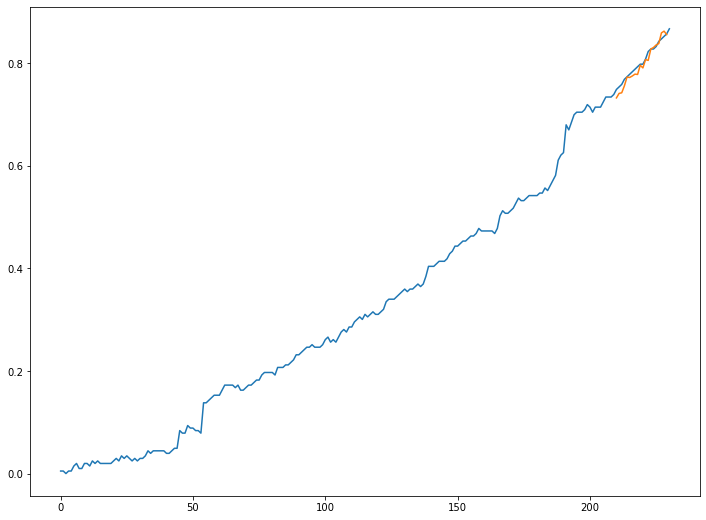

In [23]:
x_data = range(230)
plt.figure(figsize=(12, 9))
plt.plot(train_feature2[:, 0,0], label ='actual')

predictions = model(train_feature2)
plt.plot(x_data[210:], predictions[210,:,0], label='predictions')

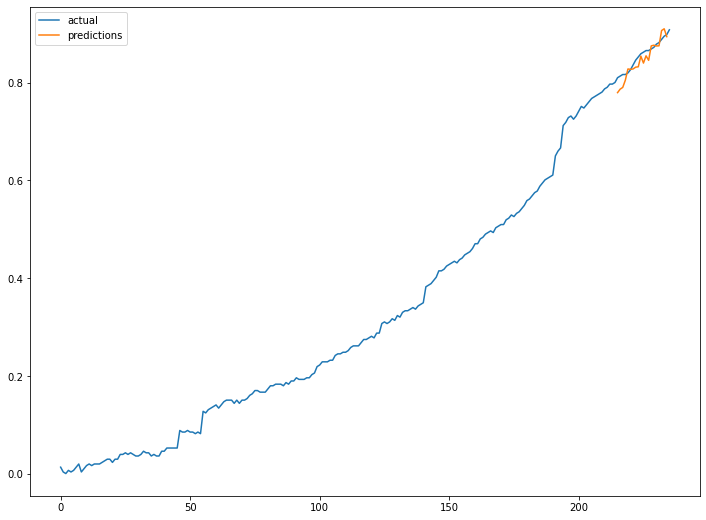

In [25]:
test_df = pd.read_csv('testset/J0003_0024_0221_20110307012732_cell_06.csv', encoding='utf8')

x_test2 = test_df['Resistance']


x_test2 = pd.DataFrame(x_test2)
x_test2.columns = scale_cols
x_test2 = scaler.fit_transform(x_test2)
x_test2 = pd.DataFrame(x_test2)
y_test2 = x_test2

train_feature2, train_label2 = make_dataset(x_test2, y_test2, forecasting)

predictions = model.predict(train_feature2)

feature_len = len(train_feature2) - 1
plot_len = feature_len-OUT_STEPS

x_data = range(feature_len)
plt.figure(figsize=(12, 9))
plt.plot(train_feature2[:, 0,0], label ='actual')
plt.plot(x_data[plot_len:], predictions[plot_len,:,0], label='predictions')
plt.legend()

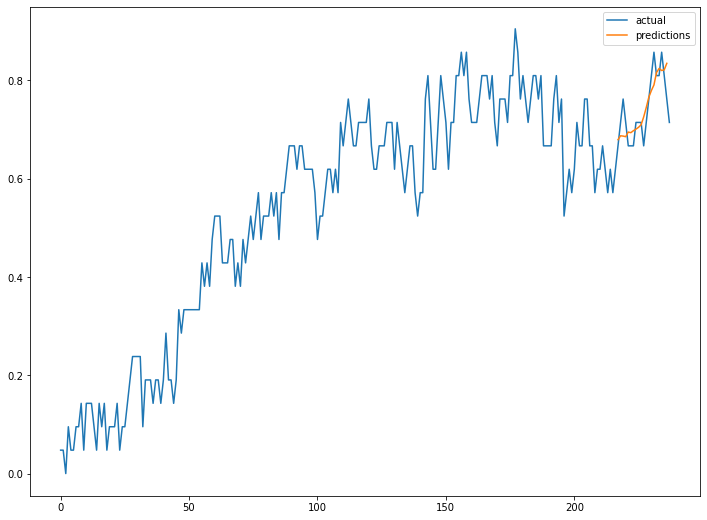

In [26]:
test_df = pd.read_csv('testset/J0003_0024_0221_20110307012732_cell_03.csv', encoding='utf8')

x_test2 = test_df['Resistance']


x_test2 = pd.DataFrame(x_test2)
x_test2.columns = scale_cols
x_test2 = scaler.fit_transform(x_test2)
x_test2 = pd.DataFrame(x_test2)
y_test2 = x_test2

train_feature2, train_label2 = make_dataset(x_test2, y_test2, forecasting)

predictions = model.predict(train_feature2)

feature_len = len(train_feature2) - 1
plot_len = feature_len-OUT_STEPS

x_data = range(feature_len)
plt.figure(figsize=(12, 9))
plt.plot(train_feature2[:, 0,0], label ='actual')
plt.plot(x_data[plot_len:], predictions[plot_len,:,0], label='predictions')
plt.legend()

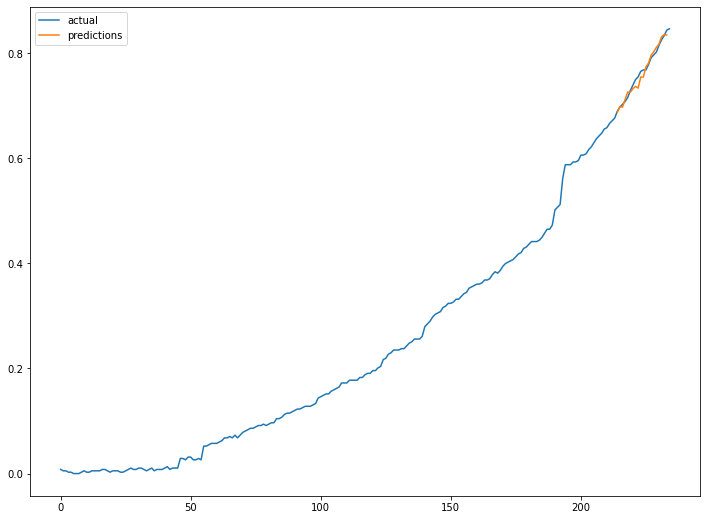

In [27]:
test_df = pd.read_csv('testset/J0003_0024_0221_20110307012732_cell_7.csv', encoding='utf8')

x_test2 = test_df['Resistance']

x_test2 = pd.DataFrame(x_test2)
x_test2.columns = scale_cols
x_test2 = scaler.fit_transform(x_test2)
x_test2 = pd.DataFrame(x_test2)
y_test2 = x_test2

train_feature2, train_label2 = make_dataset(x_test2, y_test2, forecasting)

predictions = model.predict(train_feature2)

feature_len = len(train_feature2) - 1
plot_len = feature_len-OUT_STEPS

x_data = range(feature_len)
plt.figure(figsize=(12, 9))
plt.plot(train_feature2[:, 0,0], label ='actual')
plt.plot(x_data[plot_len:], predictions[plot_len,:,0], label='predictions')
plt.legend()

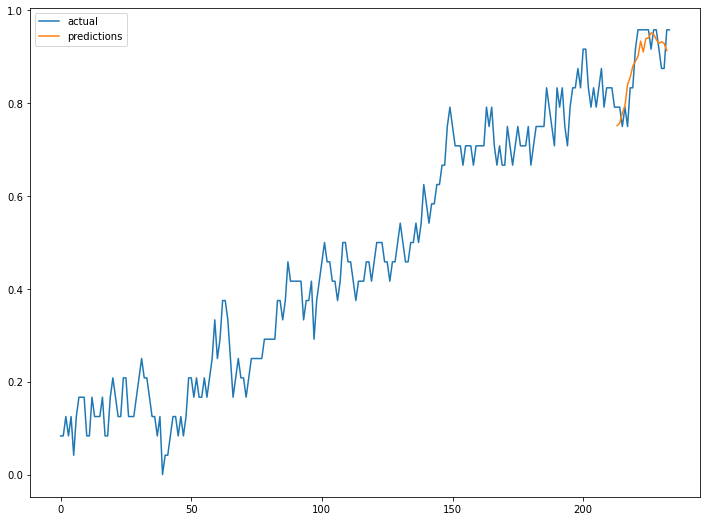

In [28]:
test_df = pd.read_csv('testset/J0003_0024_0221_20110307012732_cell_9.csv', encoding='utf8')

x_test2 = test_df['Resistance']

x_test2 = pd.DataFrame(x_test2)
x_test2.columns = scale_cols
x_test2 = scaler.fit_transform(x_test2)
x_test2 = pd.DataFrame(x_test2)
y_test2 = x_test2

train_feature2, train_label2 = make_dataset(x_test2, y_test2, forecasting)

predictions = model.predict(train_feature2)

feature_len = len(train_feature2) - 1
plot_len = feature_len-OUT_STEPS

x_data = range(feature_len)
plt.figure(figsize=(12, 9))
plt.plot(train_feature2[:, 0,0], label ='actual')
plt.plot(x_data[plot_len:], predictions[plot_len,:,0], label='predictions')
plt.legend()

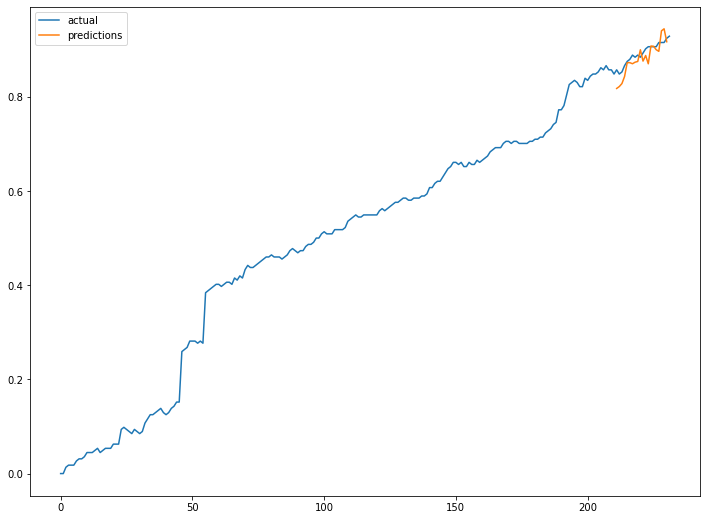

In [29]:
test_df = pd.read_csv('testset/J0003_0024_0221_20110307012732_cell_18.csv', encoding='utf8')

x_test2 = test_df['Resistance']


x_test2 = pd.DataFrame(x_test2)
x_test2.columns = scale_cols
x_test2 = scaler.fit_transform(x_test2)
x_test2 = pd.DataFrame(x_test2)
y_test2 = x_test2

train_feature2, train_label2 = make_dataset(x_test2, y_test2, forecasting)

predictions = model.predict(train_feature2)

feature_len = len(train_feature2) - 1
plot_len = feature_len-OUT_STEPS

x_data = range(feature_len)
plt.figure(figsize=(12, 9))
plt.plot(train_feature2[:, 0,0], label ='actual')
plt.plot(x_data[plot_len:], predictions[plot_len,:,0], label='predictions')
plt.legend()

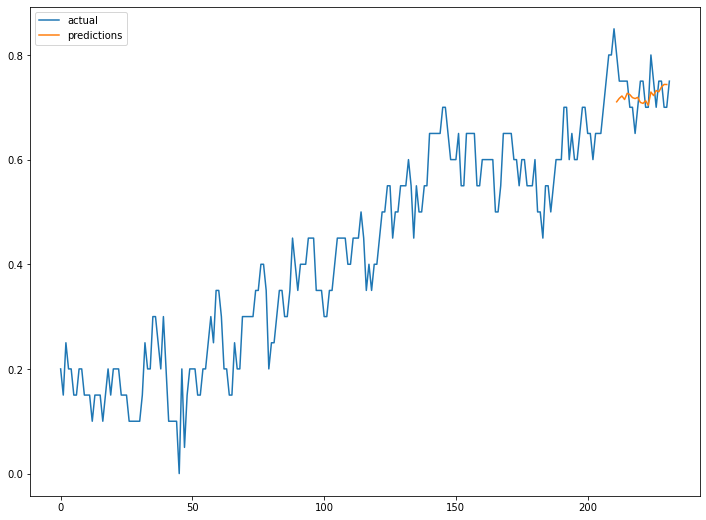

In [30]:
test_df = pd.read_csv('testset/J0003_0024_0221_20110307012732_cell_19.csv', encoding='utf8')

x_test2 = test_df['Resistance']

x_test2 = pd.DataFrame(x_test2)
x_test2.columns = scale_cols
x_test2 = scaler.fit_transform(x_test2)
x_test2 = pd.DataFrame(x_test2)
y_test2 = x_test2

train_feature2, train_label2 = make_dataset(x_test2, y_test2, forecasting)

predictions = model.predict(train_feature2)

feature_len = len(train_feature2) - 1
plot_len = feature_len-OUT_STEPS

x_data = range(feature_len)
plt.figure(figsize=(12, 9))
plt.plot(train_feature2[:, 0,0], label ='actual')
plt.plot(x_data[plot_len:], predictions[plot_len,:,0], label='predictions')
plt.legend()

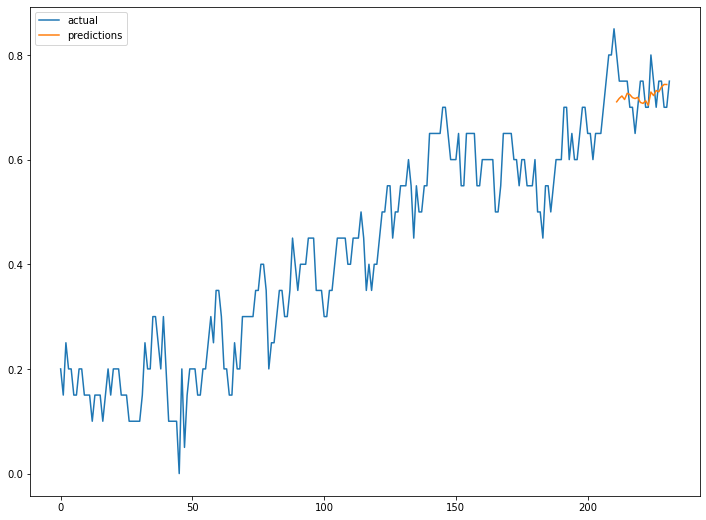

In [31]:
test_df = pd.read_csv('testset/J0003_0024_0221_20110307012732_cell_19.csv', encoding='utf8')

x_test2 = test_df['Resistance']


x_test2 = pd.DataFrame(x_test2)
x_test2.columns = scale_cols
x_test2 = scaler.fit_transform(x_test2)
x_test2 = pd.DataFrame(x_test2)
y_test2 = x_test2

train_feature2, train_label2 = make_dataset(x_test2, y_test2, forecasting)

predictions = model.predict(train_feature2)

feature_len = len(train_feature2) - 1
plot_len = feature_len-OUT_STEPS

x_data = range(feature_len)
plt.figure(figsize=(12, 9))
plt.plot(train_feature2[:, 0,0], label ='actual')
plt.plot(x_data[plot_len:], predictions[plot_len,:,0], label='predictions')
plt.legend()

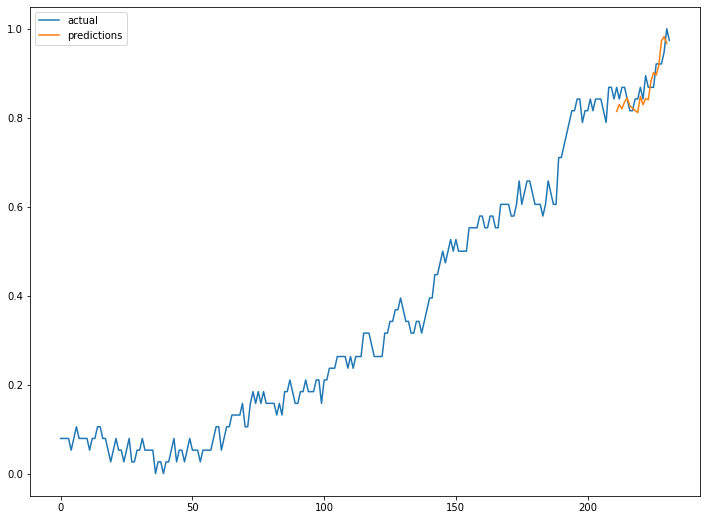

In [32]:
test_df = pd.read_csv('testset/J0003_0024_0221_20110307012732_cell_20.csv', encoding='utf8')

x_test2 = test_df['Resistance']


x_test2 = pd.DataFrame(x_test2)
x_test2.columns = scale_cols
x_test2 = scaler.fit_transform(x_test2)
x_test2 = pd.DataFrame(x_test2)
y_test2 = x_test2

train_feature2, train_label2 = make_dataset(x_test2, y_test2, forecasting)

predictions = model.predict(train_feature2)

feature_len = len(train_feature2) - 1
plot_len = feature_len-OUT_STEPS

x_data = range(feature_len)
plt.figure(figsize=(12, 9))
plt.plot(train_feature2[:, 0,0], label ='actual')
plt.plot(x_data[plot_len:], predictions[plot_len,:,0], label='predictions')
plt.legend()

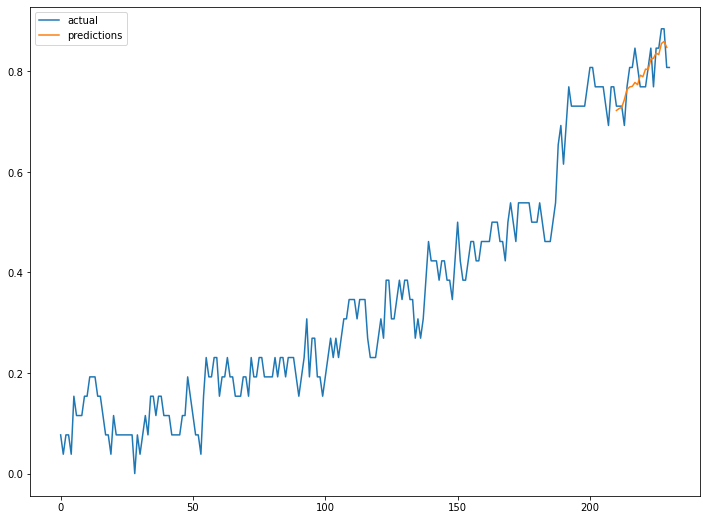

In [33]:
test_df = pd.read_csv('testset/J0003_0024_0221_20110307012732_cell_22.csv', encoding='utf8')

x_test2 = test_df['Resistance']


x_test2 = pd.DataFrame(x_test2)
x_test2.columns = scale_cols
x_test2 = scaler.fit_transform(x_test2)
x_test2 = pd.DataFrame(x_test2)
y_test2 = x_test2

train_feature2, train_label2 = make_dataset(x_test2, y_test2, forecasting)

predictions = model.predict(train_feature2)

feature_len = len(train_feature2) - 1
plot_len = feature_len-OUT_STEPS

x_data = range(feature_len)
plt.figure(figsize=(12, 9))
plt.plot(train_feature2[:, 0,0], label ='actual')
plt.plot(x_data[plot_len:], predictions[plot_len,:,0], label='predictions')
plt.legend()